In [1]:
from vbridge.core import VBridge
from vbridge.dataset.mimic_demo.tasks.mortality import mimic_48h_in_admission_mortality_task

## 0. Download Dataset
In this example, we use [mimic-iii-demo](https://physionet.org/content/mimiciii-demo/1.4/), a small subset of the mimic-iii accessible to everyone.\
Before running the example below, download the dataset by running the following command in the root directory of this project (`VBridge/`) 
```
wget -r -N -c -np https://physionet.org/files/mimiciii-demo/1.4/ -P data/
```
Ensure that the table files (.csv) exist in `data/physionet.org/files/mimiciii-demo/1.4/`.

## 1. Load Task

We show to use the system with a predefined task called *mimic_48h_in_admission_mortality*.

In the `Task` object, we define

`[dataset]`
* `task id`: the identifier of the dataset,
* `table dir`: the path where the table files are stored,

`[feature]`
* `target entity`: the entity where the label is derived from, 
* `feature entities`: the entities where the features are generated from,

`[model]`
* `task id`: the identifier of the task,
* `short desc`: a short discription of the task,
* `labels`: the label functions and specifications of the prediction tasks.

This task aims to predict the patient's **mortality risk** (i.e., die or survive) during the hospital admission\
according to the patient's demographics, label tests, and vital signs in the **first 48 hours** after being admitted. 

In [2]:
# load a pre-defined task on mimic-demo (https://physionet.org/content/mimiciii-demo/1.4/) dataset
task = mimic_48h_in_admission_mortality_task()
task

[dataset]
dataset id      : mimic-demo
table dir       : /Users/chengfurui/Projects/VBridge/data/physionet.org/files/mimiciii-demo/1.4/

[feature]
target entity   : ADMISSIONS
feature entity  : PATIENTS, ADMISSIONS, CHARTEVENTS

[model]
task id         : in-admission mortality
short desc      : Prediction whether the patient will die or survive within this admission.
labels          
- mortality     : ['low-risk', 'high-risk']

In [3]:
# create a vbridge instance based on the task
vbridge = VBridge(task)

## 2. Load Entity Set

We load the tables from the [PIC dataset](http://pic.nbscn.org/) and organize them into an `Entityset`.\
In brief, an `Entityset` is a collection of dataframes and the relationships between them.

Please check [featuretools](https://featuretools.alteryx.com/en/stable/getting_started/using_entitysets.html) for more details.

In [4]:
# load the entity set
vbridge.load_entity_set()

## 3. Generate Features

Then, we generate features from `feature entities` defined in the Task object.\
The generation process is automatically done by using the [Deep Feature Synthesis](https://featuretools.alteryx.com/en/stable/getting_started/afe.html) method. 

In [5]:
# load features
feature_matrix, feature_list = vbridge.generate_features()
feature_matrix.head()

Built 11 features
Elapsed: 00:01 | Progress: 100%|██████████
Built 103 features
Elapsed: 00:22 | Progress: 100%|██████████


,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,HAS_CHARTEVENTS_DATA,PATIENTS.GENDER,MEAN(CHARTEVENTS.VALUENUM WHERE ITEMID = 220045),MEAN(CHARTEVENTS.VALUENUM WHERE ITEMID = 220277),...,MEAN(CHARTEVENTS.VALUENUM WHERE ITEMID = 220210),STD(CHARTEVENTS.VALUENUM WHERE ITEMID = 220045),STD(CHARTEVENTS.VALUENUM WHERE ITEMID = 220277),STD(CHARTEVENTS.VALUENUM WHERE ITEMID = 220179),STD(CHARTEVENTS.VALUENUM WHERE ITEMID = 220181),STD(CHARTEVENTS.VALUENUM WHERE ITEMID = 220180),STD(CHARTEVENTS.VALUENUM WHERE ITEMID = 220210),"TREND(CHARTEVENTS.VALUENUM, CHARTTIME WHERE ITEMID = 220045)","TREND(CHARTEVENTS.VALUENUM, CHARTTIME WHERE ITEMID = 220277)","TREND(CHARTEVENTS.VALUENUM, CHARTTIME WHERE ITEMID = 220210)"
HADM_ID,,,,,,,,,,,,,,,,,,,,,
171878,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,CATHOLIC,MARRIED,WHITE,1,F,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172454,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NOT SPECIFIED,MARRIED,WHITE,1,M,105.090909,95.000000,...,18.888889,11.703345,3.312315,19.238846,9.034203,10.303802,4.214111,-0.010594,0.000286,-0.000193
167021,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NOT SPECIFIED,MARRIED,WHITE,1,M,106.541667,96.510204,...,19.843137,10.057195,1.815701,8.985427,10.915924,11.892623,5.890238,-0.012533,0.000547,-0.001524
164869,EMERGENCY,CLINIC REFERRAL/PREMATURE,Medicare,CATHOLIC,MARRIED,WHITE,1,M,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158100,EMERGENCY,CLINIC REFERRAL/PREMATURE,Medicare,PROTESTANT QUAKER,MARRIED,BLACK/AFRICAN AMERICAN,1,F,92.080000,96.440000,...,16.560000,6.981643,1.260952,12.354129,12.880442,12.004610,3.267007,-0.004522,-0.000763,-0.003733


## 4. Train Models

We train a sample machine learning model (i.e., xgboost) for the mortality prediction task and evaluate the model performance. \
(The dataset contains only 100 patients. So the performance is not stable.)

In [6]:
# train an xgboost model to predict the mortality risk
vbridge.train_model()

[12:30:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pass classes=[0, 1], y=[1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1
 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


,AUROC,Accuracy,Confusion Matrix,F1 Macro,Precision,Recall
mortality,0.576923,0.69697,"[[21, 5], [5, 2]]",0.546703,0.546703,0.546703


## 5. Generate Explanations

At last, we explain the model predictions.\
In specific, we provide three types of explanations in different levels.
* **Feature contributions**. We use [SHAP](https://github.com/slundberg/shap) to calculate each feature's contributions to the prediction.
* **What-if analysis**. In medical prediction problems, clinicians and biomedical researchers focus more on the **abnormal values** (i.e., out of the 95% confidence interval). Results from the what-if-analysis show the model prediction and the feature contribution after changing a patient's one abnormal feature value to the normal level.
* **Influential records**. For features with abnormal values, we calculate the influence of the raw health records (to the feature values) and summarize influential periods.

In this example, we only show the first type of explanations. Check our [paper](https://arxiv.org/abs/2108.02550) for more details. 

In [7]:
# generate shap values
shap_values = vbridge.feature_explain(X=feature_matrix, target='mortality')
shap_values.head()

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,HAS_CHARTEVENTS_DATA,PATIENTS.GENDER,MEAN(CHARTEVENTS.VALUENUM WHERE ITEMID = 220045),MEAN(CHARTEVENTS.VALUENUM WHERE ITEMID = 220277),...,MEAN(CHARTEVENTS.VALUENUM WHERE ITEMID = 220210),STD(CHARTEVENTS.VALUENUM WHERE ITEMID = 220045),STD(CHARTEVENTS.VALUENUM WHERE ITEMID = 220277),STD(CHARTEVENTS.VALUENUM WHERE ITEMID = 220179),STD(CHARTEVENTS.VALUENUM WHERE ITEMID = 220181),STD(CHARTEVENTS.VALUENUM WHERE ITEMID = 220180),STD(CHARTEVENTS.VALUENUM WHERE ITEMID = 220210),"TREND(CHARTEVENTS.VALUENUM, CHARTTIME WHERE ITEMID = 220045)","TREND(CHARTEVENTS.VALUENUM, CHARTTIME WHERE ITEMID = 220277)","TREND(CHARTEVENTS.VALUENUM, CHARTTIME WHERE ITEMID = 220210)"
0,-0.916565,-0.001998,0.025634,-0.119029,-0.828208,0.080116,0.0,-0.545256,-0.021261,-0.021928,...,0.000231,-0.039185,-0.043612,-0.156132,-0.051050,-0.032722,-0.273804,0.162708,0.284096,0.041566
1,0.020589,0.002260,-0.737734,-0.579125,-0.358676,0.034235,0.0,-0.237292,0.024318,-0.009609,...,-0.055227,-0.043290,-0.219628,-0.015402,-0.195934,-0.045228,-0.279453,-0.166451,-1.253851,-0.178241
2,0.027226,0.052980,-1.013760,-0.469674,-0.294049,0.040346,0.0,-0.201595,0.026365,-0.030380,...,0.002431,-0.096420,-0.199883,0.459256,-0.195934,0.000655,1.848767,-0.119549,-1.809079,-0.020796
3,0.058539,-0.013138,0.201326,0.399434,-0.748340,0.297441,0.0,0.253149,-0.006754,-0.014409,...,0.022462,-0.039185,-0.043612,-0.112738,-0.051522,-0.027878,-0.294467,0.174093,0.383914,0.051635
4,0.041428,-0.027206,-0.107541,-1.042044,-0.888321,-0.245506,0.0,0.358375,0.124730,-0.001956,...,-0.185894,0.535021,0.024320,0.218882,0.438904,0.399365,-0.159427,-0.101408,-0.094133,0.060495


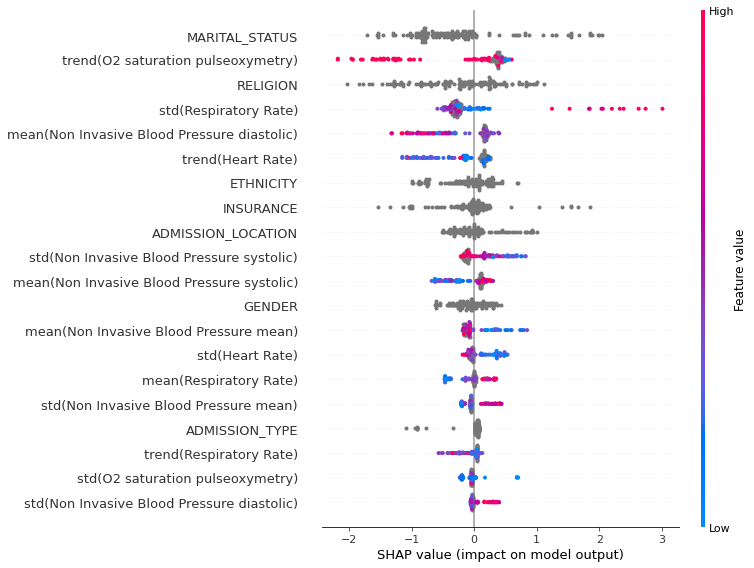

In [8]:
import shap

from vbridge.utils.entityset_helpers import get_item_dict
from vbridge.utils.feature_helpers import get_feature_description

# rename the feature names to interpretable ones
item_dict = get_item_dict(vbridge.entity_set)
feature_names = [get_feature_description(feature, item_dict)['desc'] for feature in feature_list]

# visualize the shap values of the most important features
shap.summary_plot(shap_values.values, feature_matrix.values, feature_names=feature_names)